## Crop and Fertilizer recommendation system

In [1]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#load the dataset
crop = pd.read_csv('/Users/vinuthnarajeswari/Desktop/cfrs/dataset/Crop_recommendation copy.csv')

In [3]:
crop.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [4]:
crop.tail()

,N,P,K,temperature,humidity,ph,rainfall,label
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee
2199,104,18,30,23.603016,60.396475,6.779833,140.937041,coffee


In [5]:
crop.shape


(2200, 8)

In [6]:
crop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [7]:
# to check missing values
crop.isnull()

,N,P,K,temperature,humidity,ph,rainfall,label
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
2195,False,False,False,False,False,False,False,False
2196,False,False,False,False,False,False,False,False
2197,False,False,False,False,False,False,False,False
2198,False,False,False,False,False,False,False,False


In [8]:
crop.isnull().sum() # to check missing values

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [9]:
crop.duplicated() # to check duplicate values

0       False
1       False
2       False
3       False
4       False
        ...  
2195    False
2196    False
2197    False
2198    False
2199    False
Length: 2200, dtype: bool

In [10]:
crop.duplicated().sum() # to check duplicate values

0

In [11]:
crop.describe() # to check the statistics of the data set

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [12]:
crop.columns

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='object')

In [13]:
#Check the target feature distribution
crop['label'].value_counts()

label
rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: count, dtype: int64

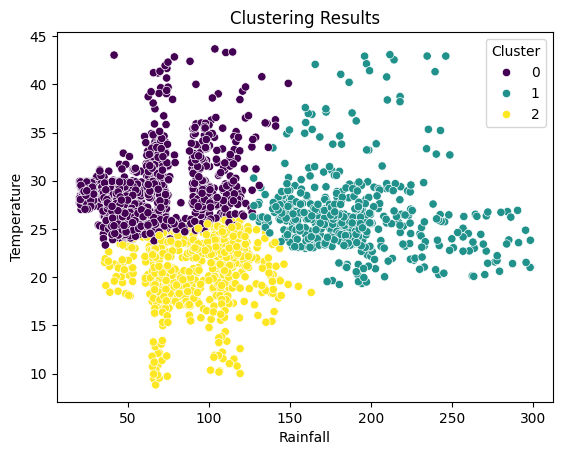

In [14]:
#Scatter Plot
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt

# Selecting relevant features for clustering
features = crop[['rainfall', 'temperature', 'ph']].dropna()

# Scaling 
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)
kmeans = KMeans(n_clusters=3, random_state=42)
crop['Cluster'] = kmeans.fit_predict(scaled_features)

# Plot
sns.scatterplot(x=crop['rainfall'], y=crop['temperature'], hue=crop['Cluster'], palette='viridis')
plt.title("Clustering Results")
plt.xlabel("Rainfall")
plt.ylabel("Temperature")
plt.show()


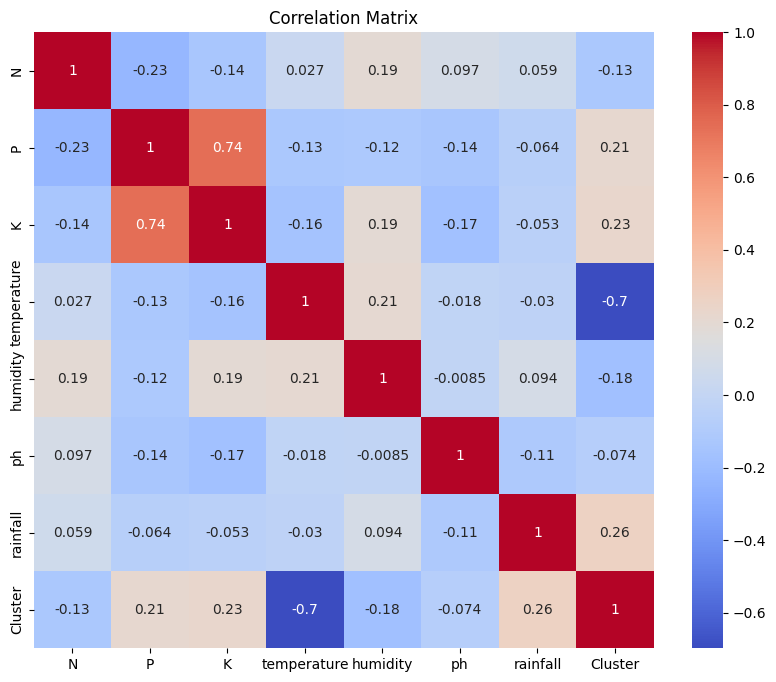

In [15]:
# Correlation Analysis
# Heatmap(CM)
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numeric columns
numeric_columns = crop.select_dtypes(include='number')

# Correlation matrix
corr_matrix = numeric_columns.corr()

# Plot
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()



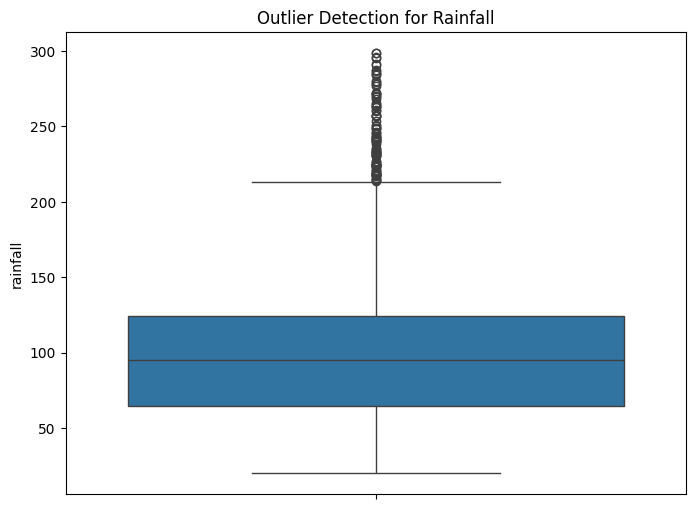

In [16]:
# Outlier Detection
plt.figure(figsize=(8, 6))
sns.boxplot(crop['rainfall'])
plt.title("Outlier Detection for Rainfall")
plt.show()


In [17]:
features=crop.columns.to_list()
features.remove('label')
print(features)

['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'Cluster']


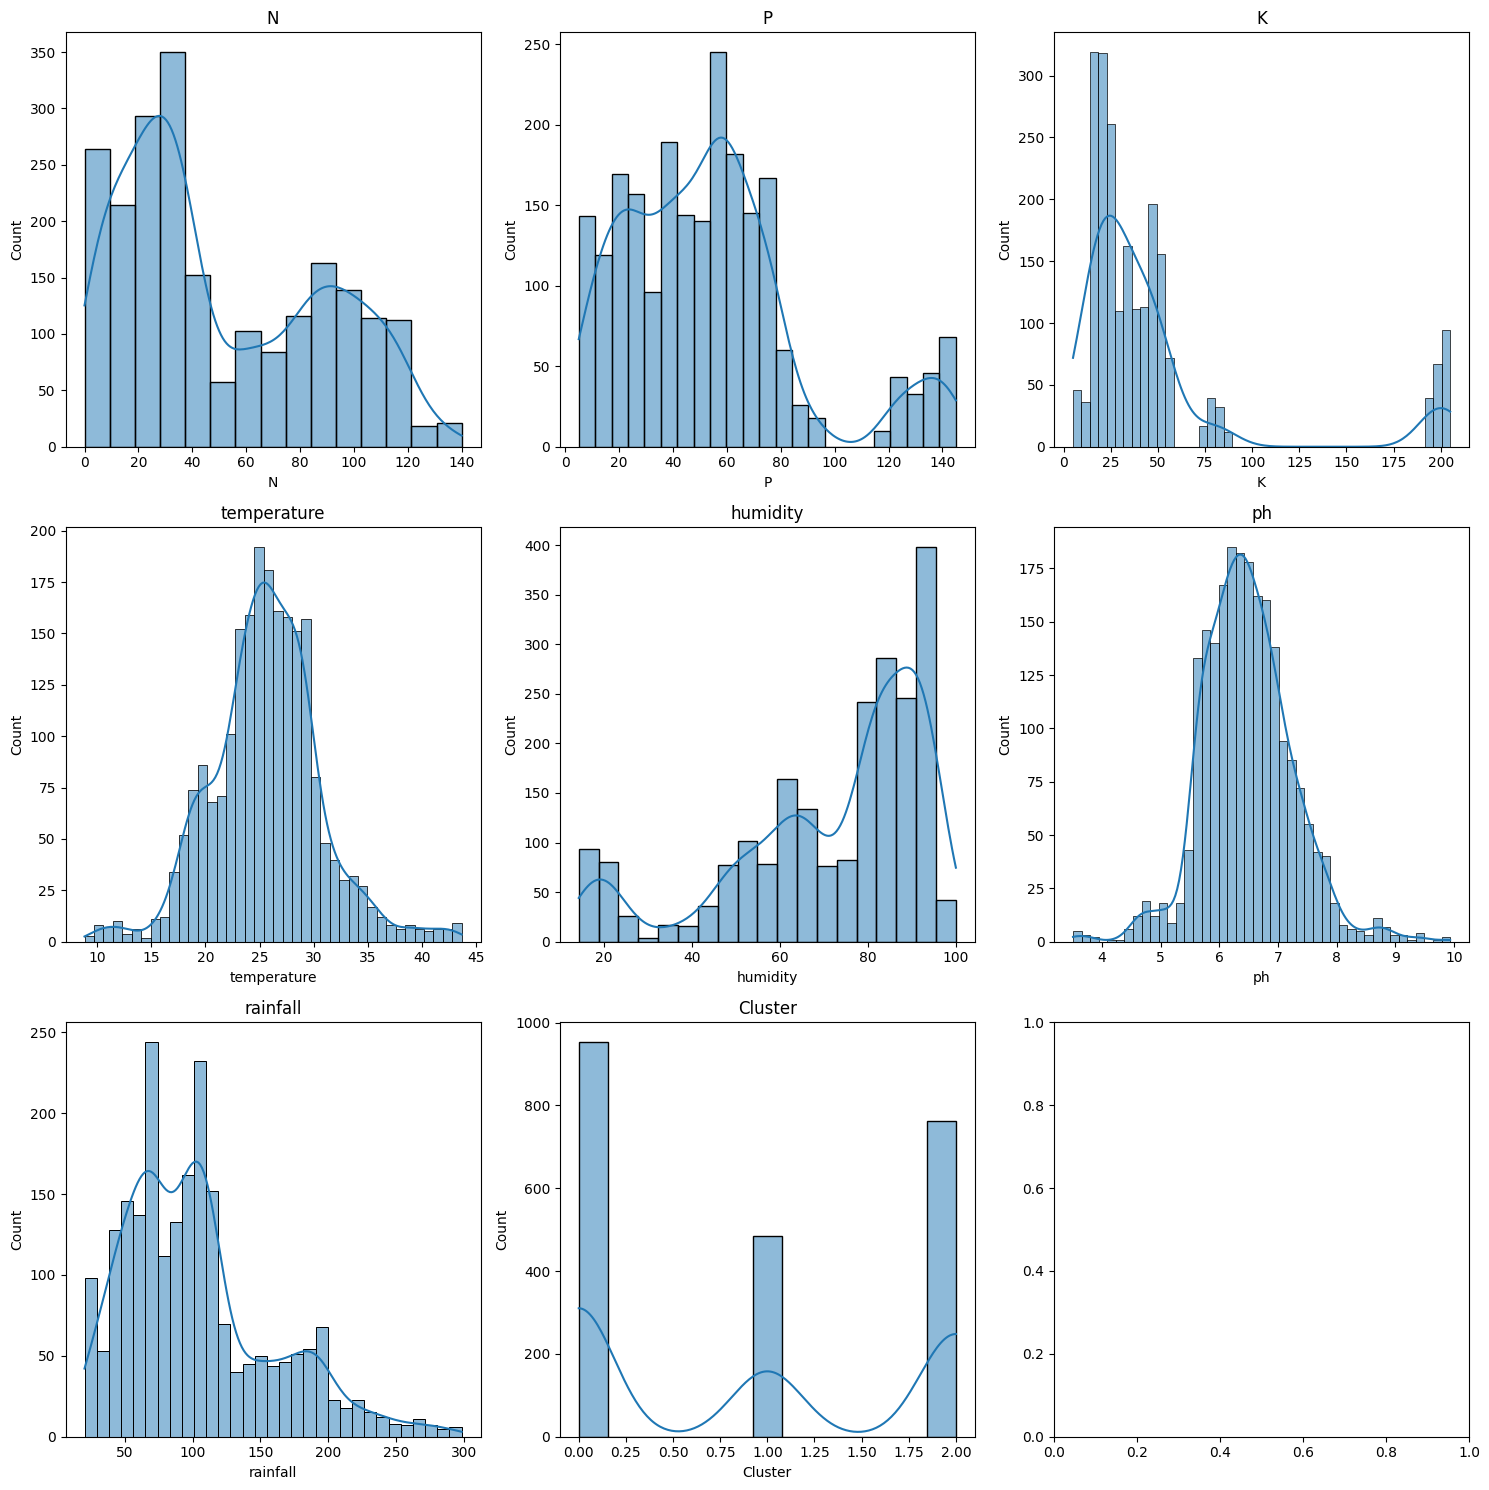

In [18]:
#visualize the distribution of each feature
import seaborn as sns
fig, ax=plt.subplots(3,3,figsize=(15,15))
for i, subplot in zip(features, ax.flatten()):
    sns.histplot(crop[i], ax=subplot, kde=True)
    subplot.set_title(i)
plt.tight_layout()
plt.show()

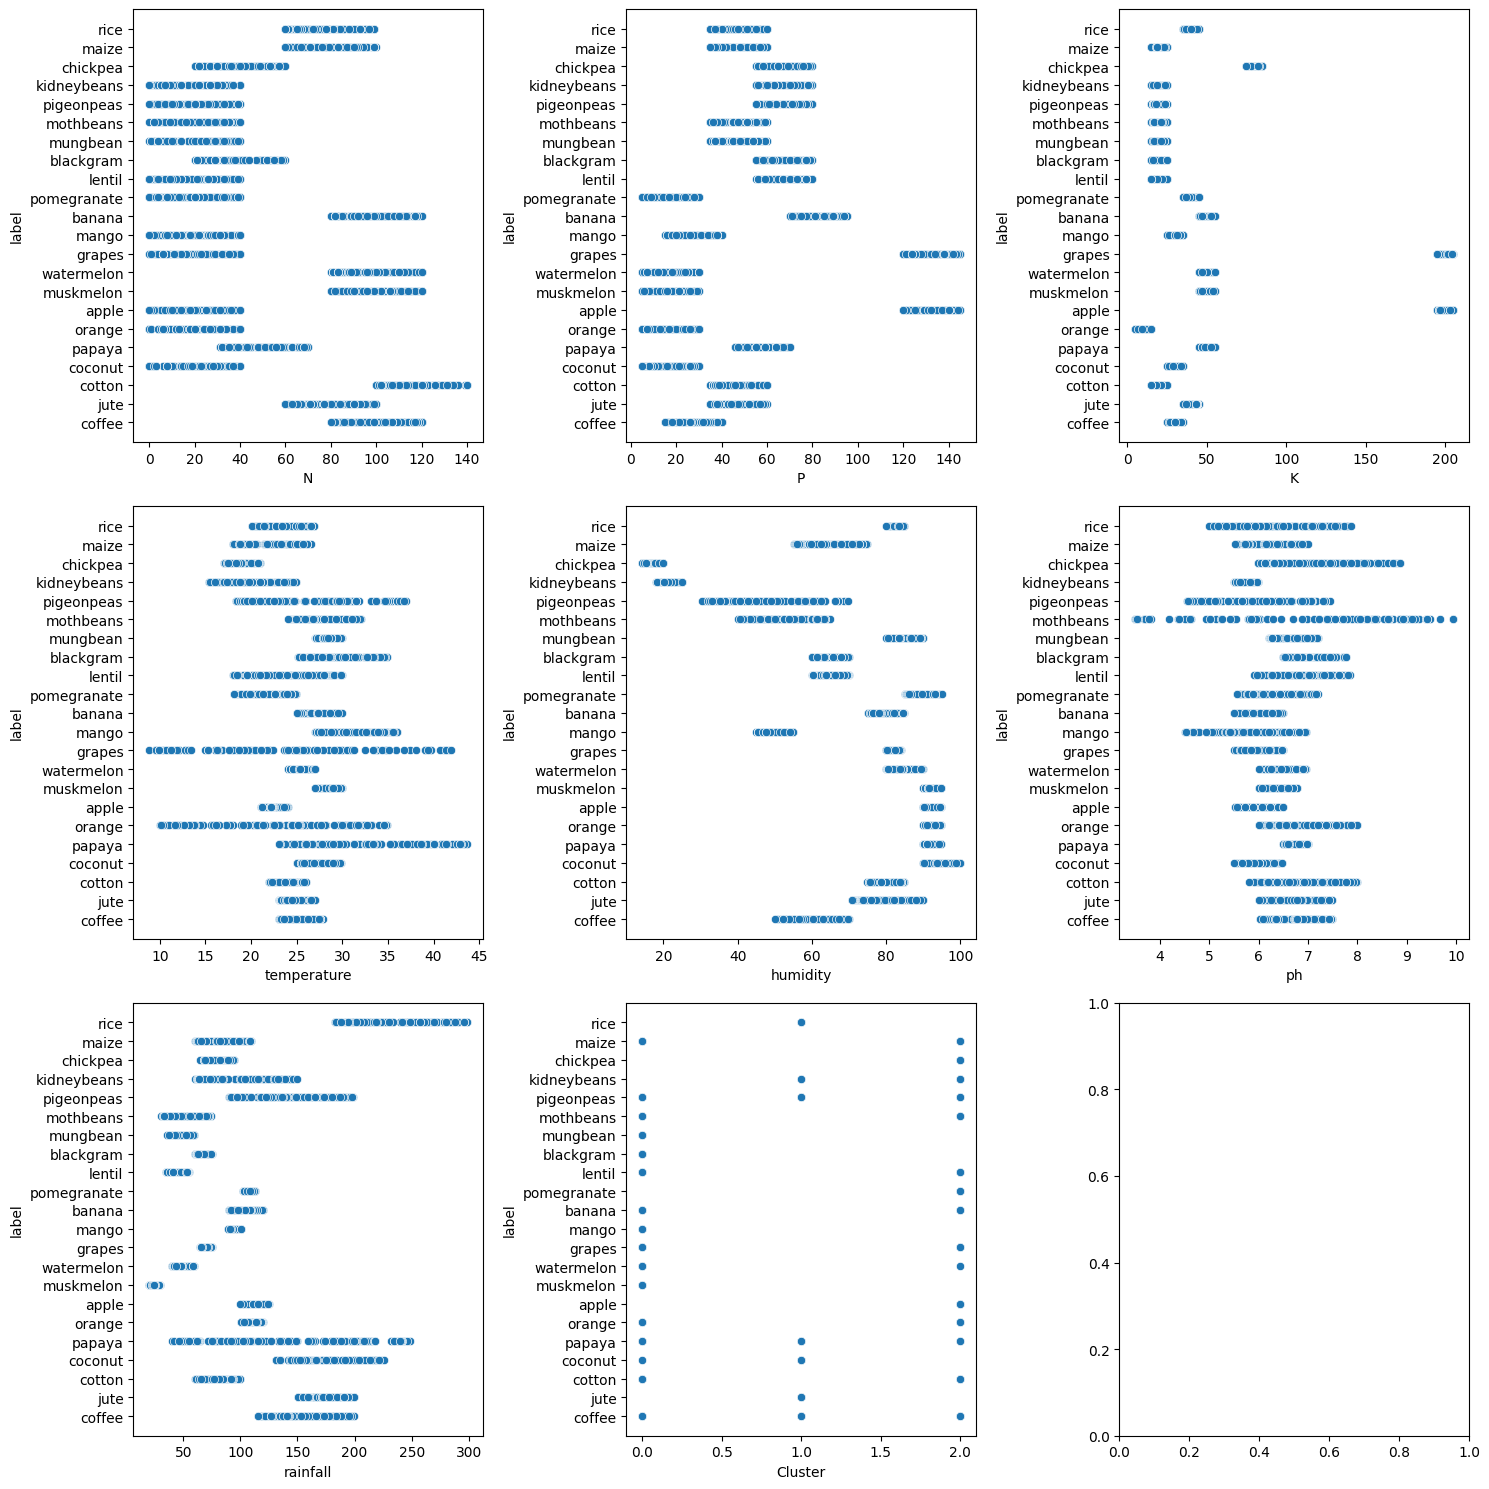

In [19]:
#plot scatter plot
fig, ax=plt.subplots(3,3,figsize=(15,15))
for i, subplot in zip(features, ax.flatten()):
    sns.scatterplot(x=i, y='label', data=crop, ax=subplot)
plt.tight_layout()
plt.show()

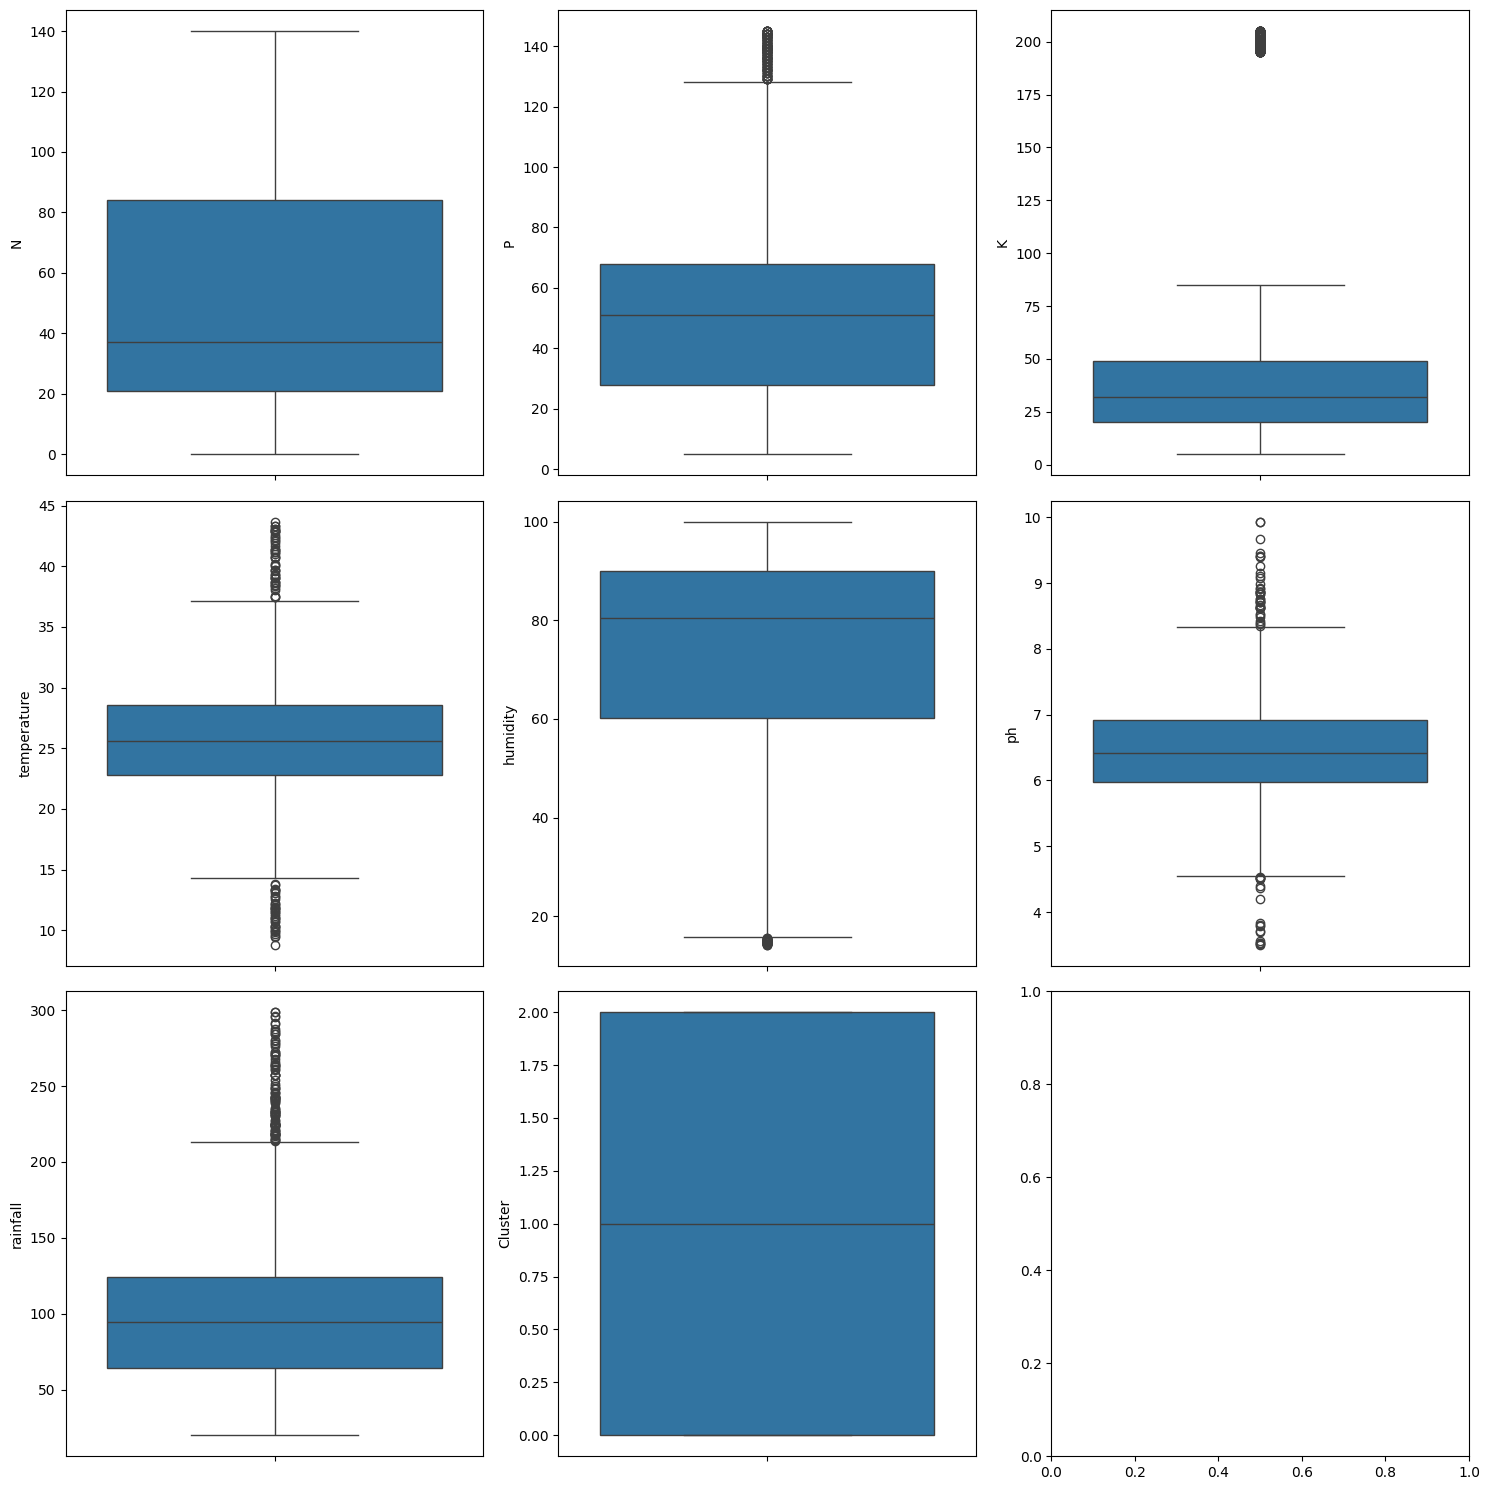

In [20]:
#finding outliers
fig, ax=plt.subplots(3,3,figsize=(15,15))
for i, subplot in zip(features, ax.flatten()):
    sns.boxplot(crop[i], ax=subplot)
plt.tight_layout()
plt.show()

In [21]:
#correlation of the features
num_cols = crop.select_dtypes(include=[np.number])
num_cols

,N,P,K,temperature,humidity,ph,rainfall,Cluster
0,90,42,43,20.879744,82.002744,6.502985,202.935536,1
1,85,58,41,21.770462,80.319644,7.038096,226.655537,1
2,60,55,44,23.004459,82.320763,7.840207,263.964248,1
3,74,35,40,26.491096,80.158363,6.980401,242.864034,1
4,78,42,42,20.130175,81.604873,7.628473,262.717340,1
...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,1
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,1
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,1
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,1


In [22]:
corr=num_cols.corr()
corr

,N,P,K,temperature,humidity,ph,rainfall,Cluster
N,1.000000,-0.231460,-0.140512,0.026504,0.190688,0.096683,0.059020,-0.127795
P,-0.231460,1.000000,0.736232,-0.127541,-0.118734,-0.138019,-0.063839,0.212436
K,-0.140512,0.736232,1.000000,-0.160387,0.190859,-0.169503,-0.053461,0.229713
temperature,0.026504,-0.127541,-0.160387,1.000000,0.205320,-0.017795,-0.030084,-0.698403
humidity,0.190688,-0.118734,0.190859,0.205320,1.000000,-0.008483,0.094423,-0.177611
ph,0.096683,-0.138019,-0.169503,-0.017795,-0.008483,1.000000,-0.109069,-0.074120
rainfall,0.059020,-0.063839,-0.053461,-0.030084,0.094423,-0.109069,1.000000,0.264733
Cluster,-0.127795,0.212436,0.229713,-0.698403,-0.177611,-0.074120,0.264733,1.000000


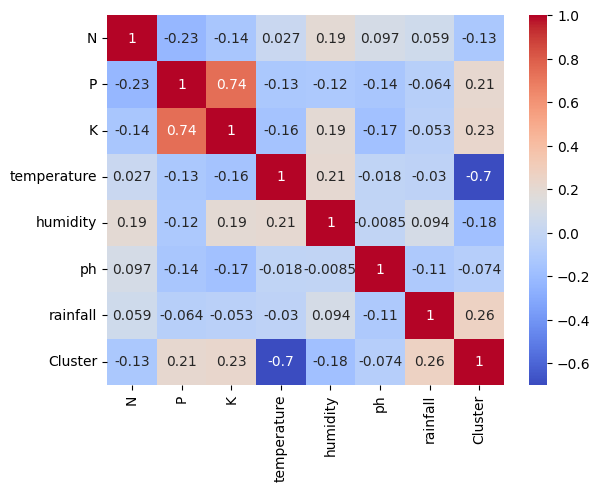

In [23]:
#visualizing with heatmap
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

### Encoding

In [24]:
crop['label'].unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

In [25]:
crop_dict={
    'rice':1, 'maize':2, 'chickpea':3, 'kidneybeans':4, 'pigeonpeas':5,
       'mothbeans':6, 'mungbean':7, 'blackgram':8, 'lentil':9, 'pomegranate':10,
       'banana':11, 'mango':12, 'grapes':13, 'watermelon':14, 'muskmelon':15, 'apple':16,
       'orange':17, 'papaya':18, 'coconut':19, 'cotton':20, 'jute':21, 'coffee':21
}

In [26]:
crop['crop_no']=crop['label'].map(crop_dict)

In [27]:
crop.head()

,N,P,K,temperature,humidity,ph,rainfall,label,Cluster,crop_no
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice,1,1
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice,1,1
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice,1,1
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice,1,1
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice,1,1


In [28]:
crop.tail()

,N,P,K,temperature,humidity,ph,rainfall,label,Cluster,crop_no
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee,1,21
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee,1,21
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee,1,21
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee,1,21
2199,104,18,30,23.603016,60.396475,6.779833,140.937041,coffee,2,21


In [29]:
crop.drop('label', axis=1, inplace=True)
crop.tail()

,N,P,K,temperature,humidity,ph,rainfall,Cluster,crop_no
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,1,21
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,1,21
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,1,21
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,1,21
2199,104,18,30,23.603016,60.396475,6.779833,140.937041,2,21
